In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
import sys
import json

from datetime import timedelta, date, datetime
from mpl_toolkits.mplot3d import Axes3D
# from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
# from kneed import KneeLocator
from sklearn.cluster import KMeans
# from light_famd import MCA,FAMD
from scipy import stats

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
path = os.getcwd() + '/DataForClusterization.csv'
data = pd.read_csv(path)
data

,Unnamed: 0,Date,Week_Day,Month,User_Activity,Food_Count,total_calories,total_carbs,total_fat,total_protein,...,goal_sodium,goal_sugar,goal_fiber,diff_calories,diff_carbs,diff_fat,diff_protein,diff_sodium,diff_sugar,diff_fiber
0,0,2014-09-14,Sunday,September,56,164,73701.0,6196.0,2877.0,3379.0,...,68500.0,1858.0,1047.0,-26507.0,-2862.0,-542.0,-2951.0,-9608.0,57.0,-548.0
1,1,2014-09-15,Monday,September,280,909,405220.0,39757.0,15061.0,22073.0,...,406900.0,11154.0,3874.0,-120875.0,-12829.0,-3024.0,-11912.0,-49466.0,-365.0,-1761.0
2,2,2014-09-16,Tuesday,September,279,924,400237.0,40230.0,14044.0,22207.0,...,403500.0,11127.0,3857.0,-116354.0,-12571.0,-3564.0,-10617.0,-66455.0,-1611.0,-1592.0
3,3,2014-09-17,Wednesday,September,274,861,402535.0,39267.0,14585.0,21971.0,...,387400.0,11141.0,3876.0,-107952.0,-12238.0,-2827.0,-10776.0,-59776.0,-1651.0,-1630.0
4,4,2014-09-18,Thursday,September,382,1342,541442.0,53949.0,19930.0,29552.0,...,559100.0,14571.0,5478.0,-143172.0,-14643.0,-4089.0,-13986.0,-91288.0,-2097.0,-1968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,2015-04-05,Sunday,April,515,1766,710073.0,66273.0,26095.0,34380.0,...,796050.0,20594.0,6249.0,-215289.0,-29321.0,-4724.0,-26011.0,-164363.0,-6475.0,-3294.0
204,204,2015-04-06,Monday,April,574,1940,745455.0,74221.0,27560.0,42725.0,...,896850.0,23351.0,7116.0,-307397.0,-35018.0,-7303.0,-26028.0,-214917.0,-7051.0,-2948.0
205,205,2015-04-07,Tuesday,April,351,1276,453123.0,45123.0,17046.0,26786.0,...,559550.0,14365.0,4147.0,-178125.0,-21172.0,-4245.0,-14094.0,-137787.0,-3938.0,-1428.0
206,206,2015-04-08,Wednesday,April,132,480,153984.0,14922.0,6191.0,8971.0,...,224400.0,5382.0,1561.0,-86861.0,-9824.0,-2090.0,-6406.0,-69690.0,-2176.0,-555.0


Text(0.5, 1.0, 'Frequency of Days')

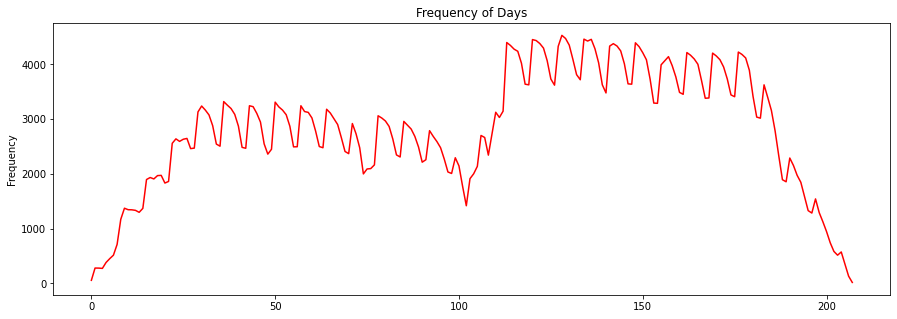

In [4]:
plt.figure(figsize=(15,5))
plt.plot(data['User_Activity'], color='red')
plt.ylabel('Frequency')
plt.title('Frequency of Days')

In [5]:
def getDayNum(Day):
    if(Day == "Monday"): return 1
    if(Day == "Tuesday"): return 2
    if(Day == "Wednesday"): return 3
    if(Day == "Thursday"): return 4
    if(Day == "Friday"): return 5
    if(Day == "Saturday"): return 6
    if(Day == "Sunday"): return 7

In [18]:
data_point= {}
# data_point['Week_Day'] = data["Week_Day"]
data_point['total_carbs'] = data["total_carbs"]
data_point['total_fat'] = data["total_fat"]
data_point['total_protein'] = data["total_protein"]
data_point['total_sodium'] = data["total_sodium"]

# for i in range(len(data_point['Week_Day'])):
#     data_point['Week_Day'][i]= getDayNum(data_point['Week_Day'][i])
   
data_point = pd.DataFrame(data_point)
data_point


,total_carbs,total_fat,total_protein,total_sodium
0,6196.0,2877.0,3379.0,58892.0
1,39757.0,15061.0,22073.0,357434.0
2,40230.0,14044.0,22207.0,337045.0
3,39267.0,14585.0,21971.0,327624.0
4,53949.0,19930.0,29552.0,467812.0
...,...,...,...,...
203,66273.0,26095.0,34380.0,631687.0
204,74221.0,27560.0,42725.0,681933.0
205,45123.0,17046.0,26786.0,421763.0
206,14922.0,6191.0,8971.0,154710.0


In [19]:
from sklearn.preprocessing import MinMaxScaler
def normalize(data,col):
    norm = MinMaxScaler().fit(data[[col]])
    data[col] = norm.transform(data[[col]])

In [20]:
normalize(data_point,"total_carbs")
normalize(data_point,"total_fat")
normalize(data_point,"total_protein")
normalize(data_point,"total_sodium")

data_point

,total_carbs,total_fat,total_protein,total_sodium
0,0.005247,0.007189,0.006676,0.006679
1,0.044287,0.043073,0.059692,0.052538
2,0.044838,0.040078,0.060072,0.049406
3,0.043717,0.041671,0.059403,0.047958
4,0.060796,0.057413,0.080903,0.069493
...,...,...,...,...
203,0.075132,0.075570,0.094595,0.094666
204,0.084378,0.079885,0.118261,0.102384
205,0.050529,0.048919,0.073058,0.062419
206,0.015398,0.016949,0.022535,0.021397


In [33]:
sorted(data_point)

Q1=data_point.quantile(0.25)
Q3=data_point.quantile(0.75)
IQR=Q3-Q1
print(data_point < (Q1 - 1.5 * IQR)) |(data_point > (Q3 + 1.5 * IQR))

     total_carbs  total_fat  total_protein  total_sodium
0          False      False          False         False
1          False      False          False         False
2          False      False          False         False
3          False      False          False         False
4          False      False          False         False
..           ...        ...            ...           ...
203        False      False          False         False
204        False      False          False         False
205        False      False          False         False
206        False      False          False         False
207        False      False          False         False

[208 rows x 4 columns]


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objs as go

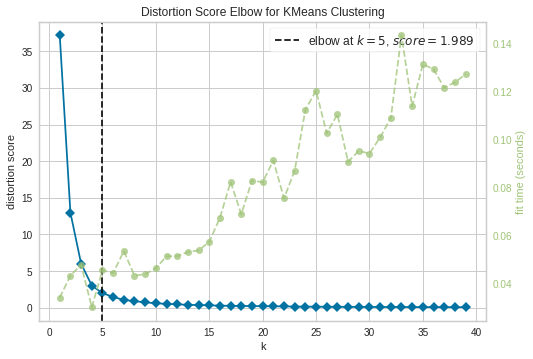

In [35]:
visualizer = kelbow_visualizer(KMeans(random_state=10), data_point, k=(1,40))
visualizer.show()
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5).fit(data_point)

for i in range(50):
    kmeans1 = KMeans(n_clusters=5).fit(data_point)
    if kmeans1.inertia_ < kmeans.inertia_:
        kmeans = kmeans1

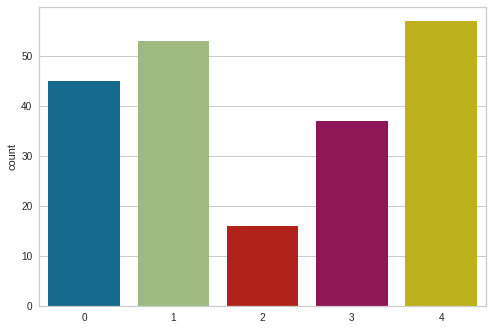

In [37]:
sns.countplot(x=kmeans.labels_)
plt.show()
# fig = go.Figure(data=[go.Pie(labels=kmeans.labels_,hole=.4)])
# fig.show()

In [38]:
labels = np.asarray(kmeans.predict(data_point))

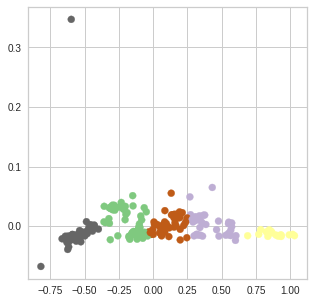

In [41]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

pca = decomposition.PCA(n_components=4)
X_reduced = pca.fit_transform(data_point)

plt.figure(figsize=(5,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=labels, cmap=plt.cm.get_cmap('Accent_r', 10))
plt.show()